**五种主流Python图像库**  
matplotlib、PIL(pillow)、OpenCV、skimage、imageio

# matplotlib

    matplotlib是Python的绘图库，与numpy一起使用可以算是一种matlab开源替代方案，在科学绘图领域被广泛使用。
    使用plt.imread()读取图片将其储存为一个RGB像素值矩阵，再进行处理。
    可以与opencv或pillow结合使用，只需要传入像素值矩阵，matplotlib便可以接手处理接下来想要完成的操作。

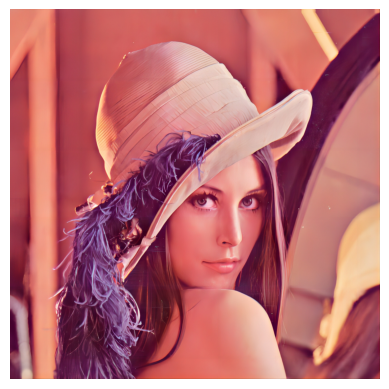

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

image_plt = plt.imread("LenaRGB.jpg") # 读取图片
# print(image_plt.shape) 
# 输出(高度h,宽度w,通道数c)
# print(image_plt.size) 
# 输出像素总数目
# print(image_plt.dtype) 
# 输出图片类型,uint8为[0-255]
# print(image_plt) 
# 输出所有像素的RGB值,一个像素RGB为[0-255 0-255 0-255]
plt.imshow(image_plt) # 将图片img插入画布
plt.axis('off') # 坐标轴刻度不显示
plt.show() # 展示画布

# PIL(pillow)

    PIL（Python Imaging Library，Python 图形库），用Python和C写的。
    由于PIL仅支持到Python 2.7，后续没有跟新版本，于是一群志愿者在PIL的基础上创建了兼容的版本，名字叫Pillow。pillow是PIL的一个分支。支持最新Python 3.x，又加入了许多新特性，因此可以直接安装使用Pillow。
    pillow提供了常见的图像读取和处理的操作，它比opencv更为轻巧，且可以与ipython notebook无缝集成。

    用PIL读取的图片不是numpy，会将图片转换为PIL自己的Image对象。
    使用Image.open()读取图片储存为一个对象，并非是numpy矩阵。

In [2]:
import numpy as np
from PIL import Image

img = Image.open("LenaRGB.jpg") # 读取图片
imgL = Image.open("LenaRGB.jpg").convert('L') # 读取图片灰度图
imgL.show() # 展示灰度图

In [15]:
print(img.format) # 输出图片格式
print(img.size) # 输出图片(宽度w,高度h)
print(img.mode) # 输出图片类型,L为灰度图,RGB为真彩色,RGBA为RGB+Alpha透明度

# PIL图像类型<class 'PIL.JpegImagePlugin.JpegImageFile'>
img_array = np.array(img) # 将对象img转化为RGB像素值矩阵
print(img_array.shape) # 输出图片(宽度w,高度h,通道c)
print(img_array.dtype) # 输出图片类型,uint8为[0-255]
# print(img_array) # 输出所有像素的RGB值
# imgN = Image.fromarray(img_array) # 将RGB像素值矩阵转化为对象imgN
# imgN.save('PicName.jpg') # 储存为文件PicName.jpg

r, g, b = img.split() # 分离通道
img = Image.merge("RGB", (b, g, r)) # 合并通道

# ROI(region of interest),只对ROI区域操作
roi = img.crop((0,0,300,300)) # (左上x，左上y，右下x，右下y)坐标
roi.show() # 展示ROI区域

JPEG
(1024, 1024)
RGB
(1024, 1024, 3)
uint8


# openCV

    开源，支持多平台，多语言，图像保存是Numpy数组，用 C 和 C++ 编写.
    用cv读取的图片就是numpy。方便进行数学运算。

    使用cv2.imread读取图片将其储存为一个BGR像素值矩阵，故若要结合使用matplotlib则要先进行转化。

In [1]:
import numpy as np # 导入numpy库
import cv2 as cv # 导入OpenCV库


img = cv.imread("LenaRGB.jpg",0) # 读取图片：灰度模式
img = cv.imread("LenaRGB.jpg",-1) # 读取图片：BGRA模式(BRG+Alpha通道)
img = cv.imread("LenaRGB.jpg",1) # 读取图片：BGR模式
img = cv.imread("LenaRGB.jpg") # 读取图片：第二参数默认为1，BGR模式
img = cv.cvtColor(img,cv.COLOR_BGR2RGB) # 将颜色通道从BGR转为RGB

cv.imshow('src',img) # 图片源src为img
# print(img.shape) # 输出图片(高度h,宽度w,通道c)
# print(img.size) # 像素总数目
# print(img.dtype) # 输出图片类型,uint8为[0-255]
# print(img) # 输出所有像素的RGB值
# cv2.waitKey()  # 按键关闭窗口
# # waitKey(delay)函数的功能是不断刷新图像，频率时间为delay，单位为ms，返回值为当前键盘按键值
# # waitKey() 是在一个给定的时间内(单位ms)等待用户按键触发; 如果用户没有按下键,则接续等待(循环)

# imgL = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) # 读取img灰度图
# cv2.imshow('gray',imgL) # 图片源gray为imgL
# cv2.imwrite('imgL.jpg',imgL) # 将imgL储存名为imgL.jpg的图片
# print(imgL.shape)  # 输出图片(高度h,宽度w)
# print(imgL.size) # 像素总数目
# print(imgL) # 输出所有像素的灰度值
# cv2.waitKey() # 按键关闭窗口

# img = img.transpose(2,0,1) # 图片矩阵变换为(通道c,高度h,宽度w)
# img = np.expand_dims(img, axis=0) # 图片矩阵扩展维度添加在第一维
# print(img.shape) # (1,通道c,高度h,宽度w)

# # 图片归一化处理
# img = cv2.imread('PicName.jpg')            
# img = img.astype("float") / 255.0  # 转化数据类型为float后进行归一化
# print(img.dtype) # 输出为：float64
# print(img) # 输出为[0-1 0-1 0-1]


# print(img[10,10]) # 访问图片img像素[10,10],输出 [0-255 0-255 0-255]
# print(imgL[10,10]) # 访问灰色图片img像素[10,10],输出 0-255
# img[10,10] = [255,255,255]  # 修改图片img像素点[10,10]为[255,255,255]
# imgL[10,10] = 255 # 修改灰色图片img像素点[10,10]为255
# img[:,:,2] = 0 # 将R通道全部修改为0

# roi = img[200:550,100:450,:]  # ROI操作,坐标(高度范围,宽度范围,通道范围)
# cv2.imshow('roi',roi) # 图片源roi为roi
# cv2.waitKey()  # 按键关闭窗口

#  skimage

    skimage包的全称是scikit-image SciKit (toolkit for SciPy) ，它对scipy.ndimage进行了扩展，提供了更多的图片处理功能。它是由python语言编写的，由scipy 社区开发和维护。skimage包由许多的子模块组成，各个子模块提供不同的功能。
    scikit-image is a collection of algorithms for image processing. It is available free of charge and free of restriction. We pride ourselves on high-quality, peer-reviewed code, written by an active community of volunteers.

    使用io.imread()读取图片将其储存为一个RGB像素值矩阵。

(1024, 1024, 3)
3145728
uint8


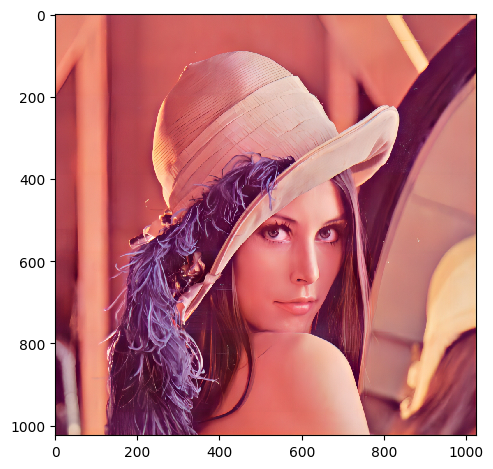

In [3]:
from skimage import io #导入skimage库
from skimage import color
import numpy as np #导入numpy库

img = io.imread("LenaRGB.jpg") #读取图片
print(img.shape) #输出图片img(高度h,宽度w,通道c)
print(img.size) #img像素总数目
print(img.dtype) #输出img图片类型,uint8为[0-255]
# io.imsave('img.png',img) #将img储存名为img.png的图片
io.imshow(img) #图片img插入画板
io.show() #展示画板


# imageio

mageio是一个Python库，提供了一个简单的接口用于读取和写入各种图像数据，包括动画图像，视频，体积数据和科学格式。



使用io.imread()读取图片将其储存为一个RGB像素值矩阵。

In [4]:
import imageio #导入imageio库
img = imageio.imread("LenaRGB.jpg") # 读取图片
# imageio.imsave('img.png',img)# 将img储存名为img.png的文件
print(img.shape) # 输出图片img(高度h,宽度w,通道c)
print(img.size) # img像素总数目
print(img.dtype) # 输出img图片类型,uint8为[0-255]
print(img) # 输出img所有像素的RGB值

plt.imshow(img) # 图片img插入画板
plt.show() #展示画板

(1024, 1024, 3)
3145728
uint8
[[[218 138 129]
  [221 141 132]
  [222 140 129]
  ...
  [230 136 108]
  [221 138 108]
  [153  78  47]]

 [[220 136 126]
  [222 138 128]
  [224 140 129]
  ...
  [234 140 112]
  [221 136 107]
  [158  81  53]]

 [[221 133 121]
  [224 136 124]
  [224 138 125]
  ...
  [235 142 111]
  [220 135 106]
  [150  70  45]]

 ...

 [[ 90  24  52]
  [ 91  21  49]
  [ 95  20  50]
  ...
  [189  76  78]
  [182  77  81]
  [146  50  52]]

 [[ 94  39  58]
  [ 90  35  54]
  [ 93  36  53]
  ...
  [178  83  81]
  [175  89  90]
  [148  67  73]]

 [[ 67  23  36]
  [ 65  23  33]
  [ 62  20  30]
  ...
  [132  52  45]
  [115  45  45]
  [ 84  22  27]]]


C:\Users\Cateacher\AppData\Local\Temp\ipykernel_19340\1645133977.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread("LenaRGB.jpg") # 读取图片


NameError: name 'plt' is not defined

# 总结

- 其他图像库读取彩色图片都以RGB形式储存，而OpenCV则是以BGR形式存储。
- 其他图像库读取图片都以numpy十六进制彩色值形式储存，而PIL读取图片是以对象形式储存。

## PIL
- 优点：彩图与灰度图都可以读取，自己可以区分，不用操作者指定mode。颜色通道默认为RGB或RGBA的顺序
- 缺点：数据不能直接用于深度学习，需要ndarray转换。
- 注意：PIL默认显示为图像的宽高，经过ndarray转化后，变化高宽（行列）

## openCV
- cv2.imread共两个参数，第一个参数为要读入的图片文件名，第二个参数为如何读取图片

- IMREAD_COLOR：以彩色BGR模式读入图片，可以用1表示；
- IMREAD_GRAYSCALE：以灰阶图读入一副彩色图片，可以用0表示；
- IMREAD_UNCHANGED：读入一幅图片，并包括其alpha通道，可以用-1表示。默认是1. 同时OpenCV不支持GIF格式的图片。

### PIL与opencv的相互转换

In [1]:
import cv2
from PIL import Image
import numpy

# PIL_to_opencv
image = Image.open("LenaRGB.jpg")
image.show()
img = cv2.cvtColor(numpy.asarray(image),cv2.COLOR_RGB2BGR)
cv2.imshow("",img)
cv2.waitKey()

# opencv_to_PIL
img = cv2.imread("LenaRGB.jpg")
cv2.imshow("",img)
image = Image.fromarray(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
image.show()
cv2.waitKey()

-1